# COMPUTER VISION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 1. MODULE COMPUTATIONAL PHOTOGRAHY
* Inpainting : Repair scratch image
* Denoising: Remove noise in image
* HDR imaging: Apply high dynamic range on image
* Contrast Preserving Decolorization
* Seamless cloning
* Non-photorealistic Rendering

### 1.1 Inpainting
* cv2.inpaint(img,mask,radius,methods): Restore the scratch in image
* https://pyimagesearch.com/2020/05/18/image-inpainting-with-opencv-and-python/
* https://www.researchgate.net/publication/238183352_An_Image_Inpainting_Technique_Based_on_the_Fast_Marching_Method
* https://www.math.ucla.edu/~bertozzi/papers/cvpr01.pdf

(275, 343, 3)

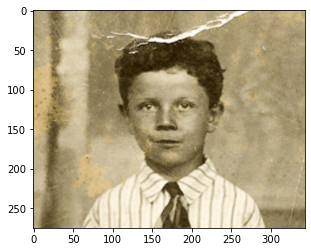

In [22]:
## Method for inpainting: cv2.INPAINT_NS, cv2.INPAINT_TELEA
scratch_face = cv2.imread('DATA/raw/scratchface.png')
scratch_face = scratch_face[:,:343,:]
plt.imshow(cv2.cvtColor(scratch_face,cv2.COLOR_BGR2RGB))
scratch_face.shape

(275, 343)

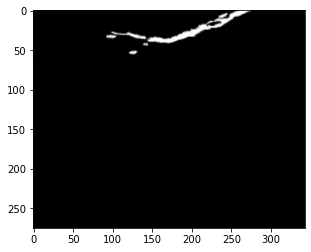

In [23]:
face_mask = cv2.imread('DATA/raw/scratchfacemask.png',0)
face_mask = face_mask[:275,:]
plt.imshow(face_mask,cmap='gray')
face_mask.shape


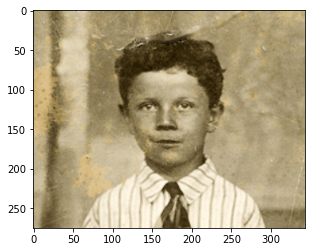

In [24]:
fix_face = cv2.inpaint(scratch_face,face_mask,10,cv2.INPAINT_NS)
plt.imshow(cv2.cvtColor(fix_face,cv2.COLOR_BGR2RGB))

(500, 375, 3)

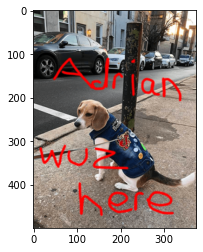

In [29]:
scratch_dog = cv2.imread('DATA/raw/scratchdog.png')
scratch_dog=scratch_dog[:500,:,:]
plt.imshow(cv2.cvtColor(scratch_dog,cv2.COLOR_BGR2RGB))
scratch_dog.shape

(500, 375)

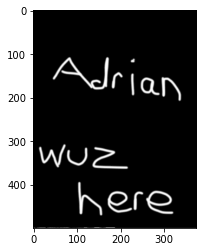

In [27]:
dog_mask = cv2.imread('DATA/raw/dogscratchmask.png',0)
plt.imshow(dog_mask,cmap='gray')
dog_mask.shape

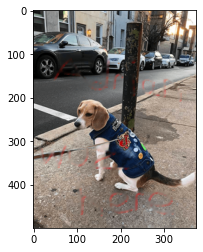

In [31]:
fix_dog = cv2.inpaint(scratch_dog,dog_mask,10,cv2.INPAINT_NS)
plt.imshow(cv2.cvtColor(fix_dog,cv2.COLOR_BGR2RGB))

### 1.2 Denoising
* https://docs.opencv.org/4.x/d1/d79/group__photo__denoise.htmlb
* cv2.fastNlMeansDenoising()
* cv2.fastNlMeansDenoisingColored() 

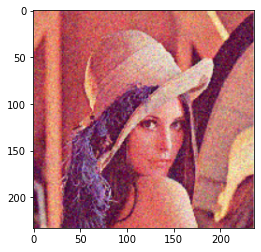

In [32]:
noisy = cv2.imread('DATA/raw/noisy.png')
plt.imshow(cv2.cvtColor(noisy,cv2.COLOR_BGR2RGB))

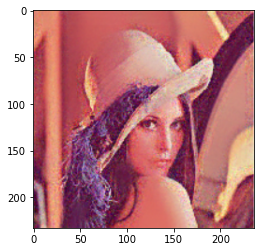

In [48]:
result = cv2.fastNlMeansDenoising(noisy,h=12,templateWindowSize=21,searchWindowSize=30)
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))


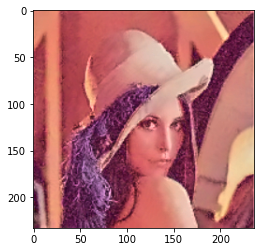

In [53]:
result2 = cv2.fastNlMeansDenoisingColored(noisy,h=7,hColor=9,templateWindowSize=7,searchWindowSize=21)
plt.imshow(cv2.cvtColor(result2,cv2.COLOR_BGR2RGB))

### 1.3: HDR Imaging
* https://docs.opencv.org/4.x/d6/df5/group__photo__hdr.html
* https://towardsdatascience.com/a-simple-hdr-implementation-on-opencv-python-2325dbd9c650
* cv2.createCalibrateDebevec():
* cv2.createCalibrateRobertson():
* cv2.createMergeDebevec():
* cv2.createMergeMertens():
* cv2.createMergeRobertson():
* cv2.createTonemap():

### 1.4 Contrast Preserving Decolorization
* http://www.cse.cuhk.edu.hk/leojia/projects/color2gray/index.html
* https://docs.opencv.org/4.x/d4/d32/group__photo__decolor.html
* cv2.decolor(): Remove color in images

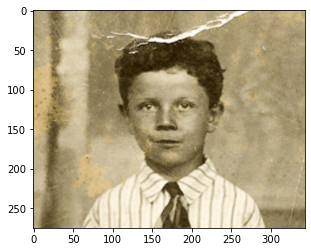

In [54]:
scratch_face = cv2.imread('DATA/raw/scratchface.png')
scratch_face = scratch_face[:,:343,:]
plt.imshow(cv2.cvtColor(scratch_face,cv2.COLOR_BGR2RGB))

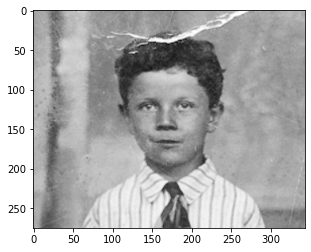

In [55]:
decolor_face_gray,decolor_face_boost = cv2.decolor(scratch_face)
plt.imshow(decolor_face_gray,cmap='gray')

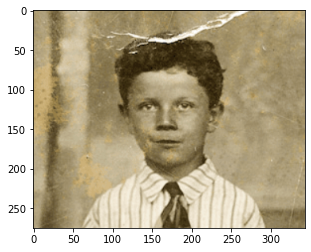

In [56]:
plt.imshow(cv2.cvtColor(decolor_face_boost,cv2.COLOR_BGR2RGB))

### 1.5 Seamless Cloning
* https://docs.opencv.org/4.x/df/da0/group__photo__clone.html
* http://amroamroamro.github.io/mexopencv/opencv/cloning_demo.html
* cv2.seamlessClone(): Merging picture
* cv2.colorChange(): changing color
* cv2.illuminationChange(): changing illumination
* cv2.textureFlattening() : Flatten the texture

#### 1.5.1: Merging picture
* cv2.seamlessClone(): Merging picture

In [84]:
## Some cloning method: cv2.NORMAL_CLONE, cv2.MIXED_CLONE , cv2.MONOCHROME_TRANSFER
src_clone1 = cv2.imread('DATA/raw/srcclone.png')
src_clone1 = src_clone1[:156,:,:]
mask_clone1 = cv2.imread('DATA/raw/maskclone.png',0)
mask_clone1 = mask_clone1[:,:233]
dst_clone1 = cv2.imread('DATA/raw/dstclone.png')
(h,w,c) = dst_clone1.shape
dst_clone1 = cv2.resize(dst_clone1,(0,0),dst_clone1,5,5)
src_clone1.shape,mask_clone1.shape,dst_clone1.shape

((156, 233, 3), (156, 233), (885, 1160, 3))

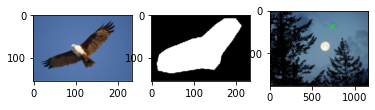

In [85]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(cv2.cvtColor(src_clone1,cv2.COLOR_BGR2RGB))
ax[1].imshow(mask_clone1,cmap='gray')
ax[2].imshow(cv2.cvtColor(dst_clone1,cv2.COLOR_BGR2RGB))

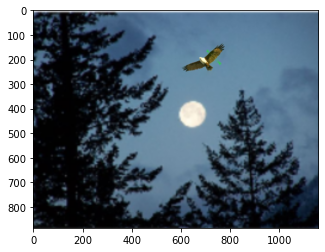

In [90]:
result1 = cv2.seamlessClone(src_clone1,dst_clone1,mask_clone1,(700,200),cv2.NORMAL_CLONE)
plt.imshow(cv2.cvtColor(result1,cv2.COLOR_BGR2RGB))

In [104]:
src_clone2 = cv2.imread('DATA/raw/srcclone2.png')
src_clone2 = src_clone2[:175,:175,:]
mask_clone2 = cv2.imread('DATA/raw/maskclone2.png',0)
dst_clone2 = cv2.imread('DATA/raw/dstclone2.png')
(h,w,c) = dst_clone1.shape
dst_clone2 = cv2.resize(dst_clone2,(0,0),dst_clone1,1,1)
src_clone2.shape,mask_clone2.shape,dst_clone2.shape

((175, 175, 3), (175, 175), (175, 177, 3))

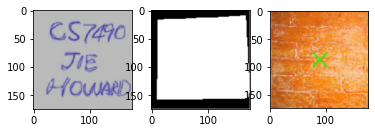

In [105]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(cv2.cvtColor(src_clone2,cv2.COLOR_BGR2RGB))
ax[1].imshow(mask_clone2,cmap='gray')
ax[2].imshow(cv2.cvtColor(dst_clone2,cv2.COLOR_BGR2RGB))

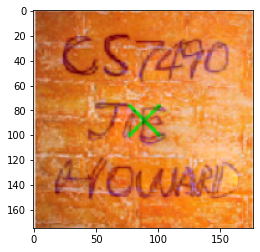

In [106]:
result2 = cv2.seamlessClone(src_clone2,dst_clone2,mask_clone2,(86,86),cv2.MIXED_CLONE)
plt.imshow(cv2.cvtColor(result2,cv2.COLOR_BGR2RGB))

#### 1.5.2: Color change
* cv2.colorChange(): changing color

In [109]:
src_clone3 = cv2.imread('DATA/raw/srcclone3.png')
src_clone3 = src_clone3[:155,:231,:]
mask_clone3 = cv2.imread('DATA/raw/maskclone3.png',0)
src_clone3.shape,mask_clone3.shape

((155, 231, 3), (155, 231))

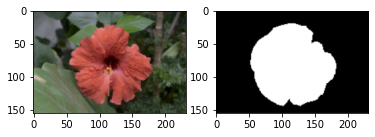

In [111]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(src_clone3,cv2.COLOR_BGR2RGB))
ax[1].imshow(mask_clone3,cmap='gray')

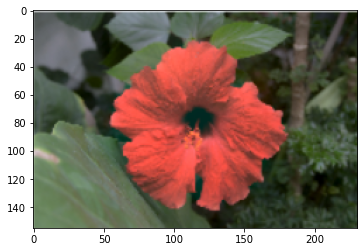

In [112]:
result3 = cv2.colorChange(src_clone3,mask_clone3,red_mul=1.5,green_mul=0.5,blue_mul=0.5)
plt.imshow(cv2.cvtColor(result3,cv2.COLOR_BGR2RGB))

#### 1.5.2: Illumination change

In [114]:
src_clone4 = cv2.imread('DATA/raw/srcclone4.png')
src_clone4 = src_clone4[:,:175,:]
mask_clone4 = cv2.imread('DATA/raw/maskclone4.png',0)
mask_clone4 = mask_clone4[:176,:]
src_clone4.shape,mask_clone4.shape

((176, 175, 3), (176, 175))

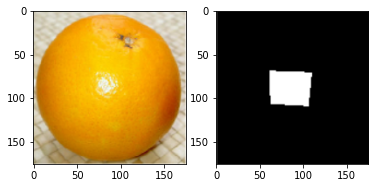

In [115]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(src_clone4,cv2.COLOR_BGR2RGB))
ax[1].imshow(mask_clone4,cmap='gray')

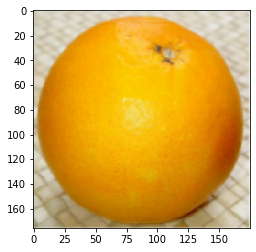

In [116]:
result4 = cv2.illuminationChange(src_clone4,mask_clone4,alpha=0.2,beta=0.2)
plt.imshow(cv2.cvtColor(result4,cv2.COLOR_BGR2RGB))

#### 1.5.3: texture flattening
* cv2.textureFlattening()

In [118]:
src_clone5 = cv2.imread('DATA/raw/srcclone5.png')
src_clone5 = src_clone5[:176,:133,:]
mask_clone5 = cv2.imread('DATA/raw/maskclone5.png',0)

src_clone5.shape,mask_clone5.shape

((176, 133, 3), (176, 133))

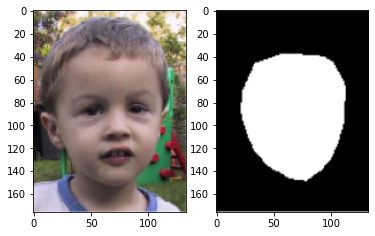

In [119]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(src_clone5,cv2.COLOR_BGR2RGB))
ax[1].imshow(mask_clone5,cmap='gray')

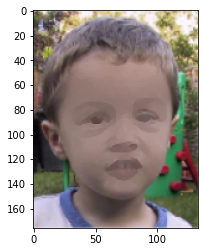

In [120]:
result5 = cv2.textureFlattening(src_clone5,mask_clone5,low_threshold=30,high_threshold=45,kernel_size=3)
plt.imshow(cv2.cvtColor(result5,cv2.COLOR_BGR2RGB))

### 1.5 Non-Photorealistic Rendering
* https://docs.opencv.org/4.x/df/dac/group__photo__render.html
* https://learnopencv.com/non-photorealistic-rendering-using-opencv-python-c/
* cv2.edgePreservingFilter():
* cv2.pencilSketch():
* cv2.detailEnhance():
* cv2.stylization():

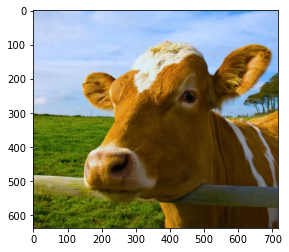

In [123]:
cow_img = cv2.imread('DATA/raw/cow.png')
plt.imshow(cv2.cvtColor(cow_img,cv2.COLOR_BGR2RGB))

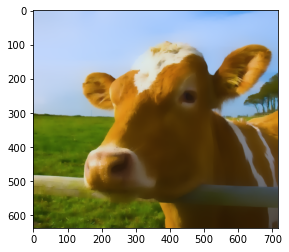

In [124]:
cow_render1 = cv2.edgePreservingFilter(cow_img, flags=1, sigma_s=60, sigma_r=0.4)
plt.imshow(cv2.cvtColor(cow_render1,cv2.COLOR_BGR2RGB))

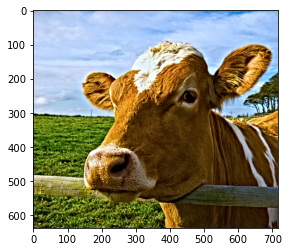

In [125]:
cow_render2 = cv2.detailEnhance(cow_img, sigma_s=10, sigma_r=0.15)
plt.imshow(cv2.cvtColor(cow_render2,cv2.COLOR_BGR2RGB))

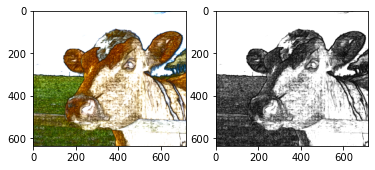

In [126]:
cow_render3_gray, cow_render3_color = cv2.pencilSketch(cow_img, sigma_s=60, sigma_r=0.07, shade_factor=0.05)
fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(cow_render3_color,cv2.COLOR_BGR2RGB))
ax[1].imshow(cow_render3_gray,cmap='gray')

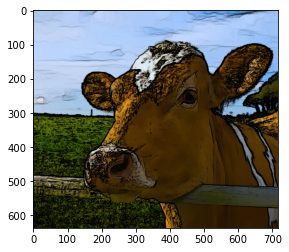

In [127]:
cow_render4 = cv2.stylization(cow_img, sigma_s=60, sigma_r=0.07)
plt.imshow(cv2.cvtColor(cow_render4,cv2.COLOR_BGR2RGB))